In [11]:
# 1. Entraînez un modèle de régression linéaire pour prédire Achats_Objets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('game_data_complete.csv', sep=',')

# Nettoyage des données
df = df[['Temps_Jeu', 'Victoires', 'ID_Joueur', 'Achats_Objets']]

df = df.groupby('ID_Joueur', as_index=True).sum().reset_index()

df = df.drop(columns=['ID_Joueur'])

df = df.drop_duplicates()

df = df.dropna()

In [12]:
# Données d'entraînement et de test
x = df[['Temps_Jeu', 'Victoires']]
y = df['Achats_Objets']
# Split des données
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# Standardisation des données
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

RMSE: 641.8232750975419
R2: -0.005703395394383914
RMSE Decision Tree: 941.2226091632095
R2 Decision Tree: -1.162836516512411
RMSE SVM: 643.6566473070055
R2 SVM: -0.011457197669182628


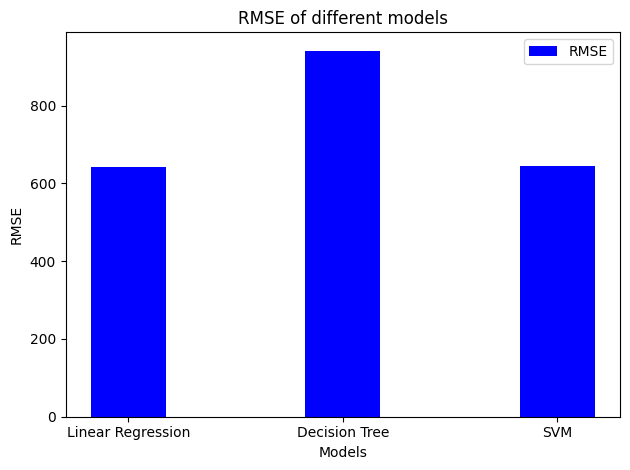

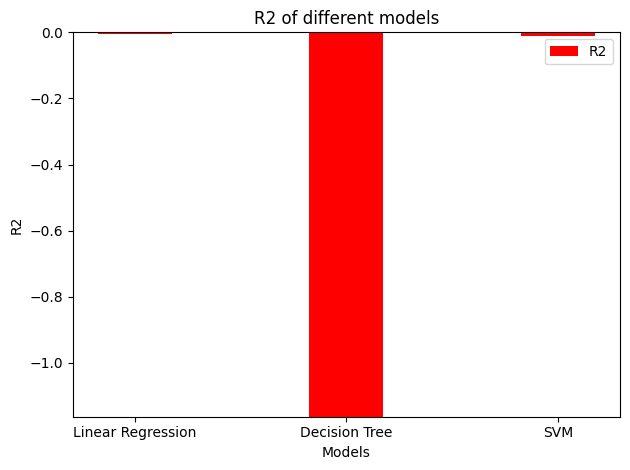

In [13]:
# Modèle de régression linéaire
regression_model = LinearRegression()
# Entraînement du modèle
regression_model.fit(x_train_normalized, y_train)
# Prédiction
y_pred = regression_model.predict(x_test_normalized)
# Evaluation
rmse_linear_regression = root_mean_squared_error(y_test, y_pred)
r2_linear_regression = r2_score(y_test, y_pred)
print(f'RMSE: {rmse_linear_regression}')
print(f'R2: {r2_linear_regression}')

# Comparez plusieurs modèles (Arbre de Décision, SVM) pour trouver le plus performant.
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Modèle d'arbre de décision

decision_tree_model = DecisionTreeRegressor()

decision_tree_model.fit(x_train_normalized, y_train)

y_pred_decision_tree = decision_tree_model.predict(x_test_normalized)

rmse_decision_tree = root_mean_squared_error(y_test, y_pred_decision_tree)

r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(f'RMSE Decision Tree: {rmse_decision_tree}')
print(f'R2 Decision Tree: {r2_decision_tree}')

# Modèle SVM

svm_model = SVR()

svm_model.fit(x_train_normalized, y_train)

y_pred_svm = svm_model.predict(x_test_normalized)

rmse_svm = root_mean_squared_error(y_test, y_pred_svm)

r2_svm = r2_score(y_test, y_pred_svm)

print(f'RMSE SVM: {rmse_svm}')
print(f'R2 SVM: {r2_svm}')


# Comparez les performances des modèles avec deux graphiques.
models = ['Linear Regression', 'Decision Tree', 'SVM']

rmse_values = [rmse_linear_regression, rmse_decision_tree, rmse_svm]
r2_values = [r2_linear_regression, r2_decision_tree, r2_svm]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Graph for RMSE values
fig, ax = plt.subplots()
rects1 = ax.bar(x, rmse_values, width, label='RMSE', color='b')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of different models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

# Graph for R2 values
fig, ax = plt.subplots()
rects2 = ax.bar(x, r2_values, width, label='R2', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('R2')
ax.set_title('R2 of different models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adjust y-axis limits to accommodate negative R2 values
min_r2 = min(r2_values)
ax.set_ylim(bottom=min(min_r2, 0))

fig.tight_layout()
plt.show()